In [2]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_single_file(
    "./revAnimated_v122EOL/revAnimated_v122EOL.safetensors",
    load_safety_checker=False,
    )
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)

pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

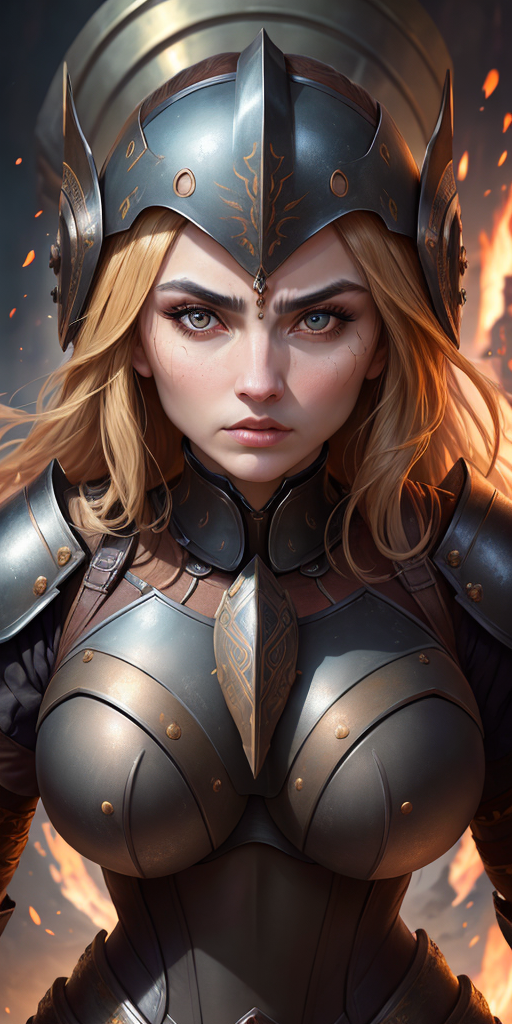

In [3]:
prompt = "((best quality)), ((masterpiece)), (detailed), beautiful face, female warrior, (defiance512:1.2), big eyes, heavy black iron armor, detailed helmet, intense gaze, battle-ready, contrasting soft skin, (lighting:1.2), close-up portrait, 4:3 aspect ratio"
negative_prompt = "3d, cartoon, anime, sketches, (worst quality, bad quality, child, cropped:1.4) ((monochrome)), ((grayscale)),  (bad-hands-5:1.0), (badhandv4:1.0), (easynegative:0.8),  (bad-artist-anime:0.8), (bad-artist:0.8), (bad_prompt:0.8), (bad-picture-chill-75v:0.8), (bad_prompt_version2:0.8),  (bad_quality:0.8)"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=30, negative_prompt=negative_prompt, width=512, height=1024).images[0]
image